In [31]:
import numpy as np
import pandas as pd
import matplotlib as plt
dataset=pd.read_csv('src/neural_network/dengue_features_train.csv')
datas=pd.read_csv('src/neural_network/dengue_labels_train.csv')

del dataset['week_start_date']

In [32]:
df_sj = dataset[dataset['city'] == 'sj']
df_iq = dataset[dataset['city'] == 'iq']

df_sjlb=datas[datas['city'] == 'sj']
df_iqlb=datas[datas['city'] == 'iq']

In [33]:
#for spiliting the data in dependent and independent form
X1=df_sj.iloc[:,0:24].values
X2=df_iq.iloc[:,0:24].values

Y1=df_sjlb.iloc[:,0:4].values
Y2=df_iqlb.iloc[:,0:4].values

y1=Y1[:,3:4]
y2=Y2[:,3:4]

In [34]:
#labelencodig to the training dataset
from sklearn.preprocessing import LabelEncoder
lb_X1=LabelEncoder()
X1[:,0]=lb_X1.fit_transform(X1[:,0])

In [35]:
#for removing the null values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X1[:, 3:24] = imputer.fit_transform(X1[:, 3:24])

In [36]:
#normalise data
from sklearn.preprocessing import StandardScaler
sc_X1=StandardScaler()
X1=sc_X1.fit_transform(X1)

In [37]:
#onehotencode training dataset
from sklearn.preprocessing import LabelEncoder
lb_X2=LabelEncoder()
X2[:,0]=lb_X2.fit_transform(X2[:,0])

In [38]:
#impute data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X2[:, 3:24] = imputer.fit_transform(X2[:, 3:24])

In [39]:
#normalise data
from sklearn.preprocessing import StandardScaler
sc_X2=StandardScaler()
X2=sc_X2.fit_transform(X2)

In [40]:
#loading the testing dataset
test=pd.read_csv("data/dengue_features_test.csv")

del test['week_start_date']
df_testsj = test[test['city'] == 'sj']
df_testiq = test[test['city'] == 'iq']


x_test1=df_testsj.iloc[:,0:24].values
x_test2=df_testiq.iloc[:,0:24].values


In [41]:
#labelencodig to the training dataset
from sklearn.preprocessing import LabelEncoder
lb_test1=LabelEncoder()
x_test1[:,0]=lb_test1.fit_transform(x_test1[:,0])


#for removing the null values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x_test1[:, 3:24] = imputer.fit_transform(x_test1[:, 3:24])


#noamlise test data
from sklearn.preprocessing import StandardScaler
sc_X11=StandardScaler()
x_test1=sc_X11.fit_transform(x_test1)


#onehotencode to the training dataset
from sklearn.preprocessing import LabelEncoder
lb_test2=LabelEncoder()
x_test2[:,0]=lb_test2.fit_transform(x_test2[:,0])


#for removing the null values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x_test2[:, 3:24] = imputer.fit_transform(x_test2[:, 3:24])

#normalise
from sklearn.preprocessing import StandardScaler
sc_X22=StandardScaler()
x_test2=sc_X22.fit_transform(x_test2)

In [42]:
from sklearn.model_selection import train_test_split

# Assuming X and y contain your feature and target data, respectively

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)



In [43]:
#creating the ann model
import keras
from keras import Sequential
from keras.layers import Dense
def build_regressor1():
    regressor1 = Sequential()
    regressor1.add(Dense(units=10, input_dim=23, activation="relu"))
    regressor1.add(Dense(units=15, activation="relu"))
    regressor1.add(Dense(units=1))
    regressor1.compile(optimizer='Adam', loss='mean_absolute_error',  metrics=['mae'])
    return regressor1

from keras.wrappers.scikit_learn import KerasRegressor
regressor1 = KerasRegressor(build_fn=build_regressor1, batch_size=32,epochs=1000)

result1=regressor1.fit(X1_train.astype(float),y1_train.astype(float))

def build_regressor2():
    regressor2 = Sequential()
    regressor2.add(Dense(units=10, input_dim=23, activation="relu"))
    regressor2.add(Dense(units=15, activation="relu"))
    regressor2.add(Dense(units=1))
    regressor2.compile(optimizer='Adam', loss='mean_absolute_error',  metrics=['mae'])
    return regressor2

from keras.wrappers.scikit_learn import KerasRegressor
regressor2 = KerasRegressor(build_fn=build_regressor2, batch_size=32,epochs=1000)

result2=regressor2.fit(X2_train.astype(float),y2_train.astype(float))



Epoch 1/1000


/var/folders/_6/qfy7c9f97wn3g4k1v_b4dvmh0000gn/T/ipykernel_45832/261856890.py:14: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor1 = KerasRegressor(build_fn=build_regressor1, batch_size=32,epochs=1000)


24/24 [==============================] - 0s 726us/step - loss: 33.9828 - mae: 33.9828
Epoch 2/1000
24/24 [==============================] - 0s 725us/step - loss: 33.3878 - mae: 33.3878
Epoch 3/1000
24/24 [==============================] - 0s 686us/step - loss: 32.6550 - mae: 32.6550
Epoch 4/1000
24/24 [==============================] - 0s 695us/step - loss: 31.6745 - mae: 31.6745
Epoch 5/1000
24/24 [==============================] - 0s 708us/step - loss: 30.4377 - mae: 30.4377
Epoch 6/1000
24/24 [==============================] - 0s 695us/step - loss: 29.1286 - mae: 29.1286
Epoch 7/1000
24/24 [==============================] - 0s 669us/step - loss: 27.8724 - mae: 27.8724
Epoch 8/1000
24/24 [==============================] - 0s 773us/step - loss: 26.7434 - mae: 26.7434
Epoch 9/1000
24/24 [==============================] - 0s 735us/step - loss: 25.7845 - mae: 25.7845
Epoch 10/1000
24/24 [==============================] - 0s 683us/step - loss: 25.1469 - mae: 25.1469
Epoch 11/1000
24/24 [=

/var/folders/_6/qfy7c9f97wn3g4k1v_b4dvmh0000gn/T/ipykernel_45832/261856890.py:27: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor2 = KerasRegressor(build_fn=build_regressor2, batch_size=32,epochs=1000)


13/13 [==============================] - 0s 773us/step - loss: 7.1732 - mae: 7.1732
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 6.9867 - mae: 6.9867
Epoch 3/1000
13/13 [==============================] - 0s 953us/step - loss: 6.8321 - mae: 6.8321
Epoch 4/1000
13/13 [==============================] - 0s 3ms/step - loss: 6.6871 - mae: 6.6871
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 6.5484 - mae: 6.5484
Epoch 6/1000
13/13 [==============================] - 0s 768us/step - loss: 6.4133 - mae: 6.4133
Epoch 7/1000
13/13 [==============================] - 0s 706us/step - loss: 6.2986 - mae: 6.2986
Epoch 8/1000
13/13 [==============================] - 0s 724us/step - loss: 6.1958 - mae: 6.1958
Epoch 9/1000
13/13 [==============================] - 0s 791us/step - loss: 6.0992 - mae: 6.0992
Epoch 10/1000
13/13 [==============================] - 0s 750us/step - loss: 6.0107 - mae: 6.0107
Epoch 11/1000
13/13 [===========================

In [44]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

test_pred1=regressor1.predict(X1_test)
r2 = r2_score(test_pred1, y1_test)
mae1 = mean_absolute_error(test_pred1, y1_test)

test_pred2 = regressor2.predict(X2_test)
r3 = r2_score(test_pred2, y2_test)
mae2 = mean_absolute_error(test_pred2, y2_test)


print("R2 Score:", r2, r3)
print("MAE Score:", mae1, mae2)

4/4 [==============================] - 0s 748us/step
R2 Score: -4.271732728976696 -1.963229058377011
MAE Score: 22.178537993989092 6.355169987449279


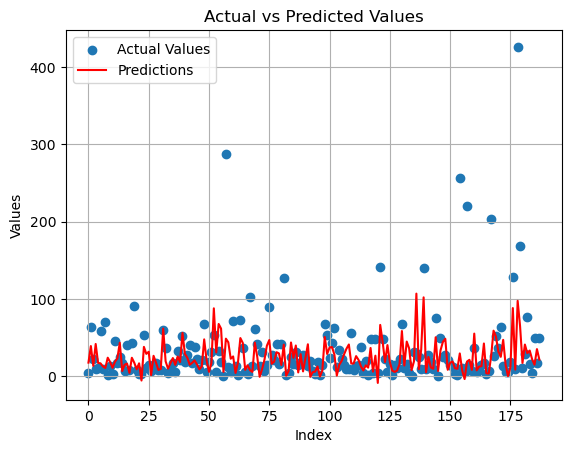

In [45]:
import matplotlib.pyplot as plt

# Assuming y_test contains actual values and predictions contains predicted values

# Scatter plot of actual values
plt.scatter(range(len(y1_test)), y1_test, label='Actual Values')

# Line plot of predicted values
plt.plot(range(len(test_pred1)), test_pred1, color='red', label='Predictions')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


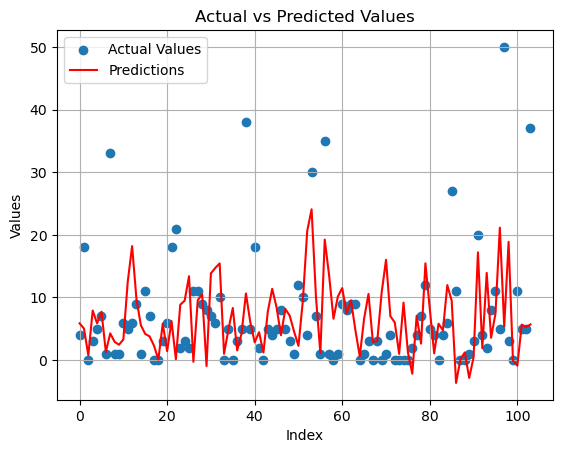

In [46]:
import matplotlib.pyplot as plt

# Assuming y_test contains actual values and predictions contains predicted values

# Scatter plot of actual values
plt.scatter(range(len(y2_test)), y2_test, label='Actual Values')

# Line plot of predicted values
plt.plot(range(len(test_pred2)), test_pred2, color='red', label='Predictions')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
